# *View*

원소의 수를 유지하면서 텐서의 크기 변경<br>
numpy reshape와 같은 역할<br>
##### view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 함.
##### pytorch view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추

In [2]:
import numpy as np
import torch

In [3]:
li1 = [[[0, 1, 2, 3], [3, 4, 5, 6]],
       [[6, 7, 8, 9], [9, 10, 11, 12]],
       [[12, 13, 14, 15], [15, 16, 17, 18]]
      ]
print(li1)
t = np.array(li1)
print(t)
ft = torch.Tensor(t)
print(ft)
print(ft.shape)  # 2 * 2 * 3

[[[0, 1, 2, 3], [3, 4, 5, 6]], [[6, 7, 8, 9], [9, 10, 11, 12]], [[12, 13, 14, 15], [15, 16, 17, 18]]]
[[[ 0  1  2  3]
  [ 3  4  5  6]]

 [[ 6  7  8  9]
  [ 9 10 11 12]]

 [[12 13 14 15]
  [15 16 17 18]]]
tensor([[[ 0.,  1.,  2.,  3.],
         [ 3.,  4.,  5.,  6.]],

        [[ 6.,  7.,  8.,  9.],
         [ 9., 10., 11., 12.]],

        [[12., 13., 14., 15.],
         [15., 16., 17., 18.]]])
torch.Size([3, 2, 4])


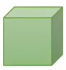
<center>3(batch_size) * 2(sentence_length) * 4(word_vec_dimension)</center>

# 

### *3D Tensor to 2D Tensor*

In [4]:
ft = torch.Tensor([[[0, 1, 2, 3], [3, 4, 5, 6]],
                   [[6, 7, 8, 9], [9, 10, 11, 12]],
                   [[12, 13, 14, 15], [15, 16, 17, 18]]
                  ])
print(ft.shape)
print(ft.view([-1, 3]))  # -1 : 사용자 미지정으로 크기 유추  (-1, 3) 크기 변경
print(ft.view([-1, 3]).shape)

torch.Size([3, 2, 4])
tensor([[ 0.,  1.,  2.],
        [ 3.,  3.,  4.],
        [ 5.,  6.,  6.],
        [ 7.,  8.,  9.],
        [ 9., 10., 11.],
        [12., 12., 13.],
        [14., 15., 15.],
        [16., 17., 18.]])
torch.Size([8, 3])


### *3D Tensor reshape*

In [5]:
print(ft.view([-1, 2, 2]))
print(ft.view([-1, 2, 2]).shape)
print(" ")
print(ft.view([-1, 2, 4]))
print(ft.view([-1, 2, 4]).shape)

tensor([[[ 0.,  1.],
         [ 2.,  3.]],

        [[ 3.,  4.],
         [ 5.,  6.]],

        [[ 6.,  7.],
         [ 8.,  9.]],

        [[ 9., 10.],
         [11., 12.]],

        [[12., 13.],
         [14., 15.]],

        [[15., 16.],
         [17., 18.]]])
torch.Size([6, 2, 2])
 
tensor([[[ 0.,  1.,  2.,  3.],
         [ 3.,  4.,  5.,  6.]],

        [[ 6.,  7.,  8.,  9.],
         [ 9., 10., 11., 12.]],

        [[12., 13., 14., 15.],
         [15., 16., 17., 18.]]])
torch.Size([3, 2, 4])


# 

### *Squeeze*

1차원 제거 벗겨내기

In [6]:
ft = torch.Tensor([[[0], [1]],
                   [[2], [3]],
                   [[4], [5]]
                  ])
print(ft)
print(ft.shape)
print("")
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[[0.],
         [1.]],

        [[2.],
         [3.]],

        [[4.],
         [5.]]])
torch.Size([3, 2, 1])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])
torch.Size([3, 2])


### *Unsqueeze*

차원 추가

In [7]:
ft = torch.Tensor([0, 1, 2, 3, 4, 5])
print(ft) # 1D
print(ft.shape)
print(" ")
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)
print(" ")
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)
print(" ")
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([0., 1., 2., 3., 4., 5.])
torch.Size([6])
 
tensor([[0., 1., 2., 3., 4., 5.]])
torch.Size([1, 6])
 
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]])
torch.Size([6, 1])
 
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]])
torch.Size([6, 1])


In [8]:
print(ft.view(-1, 3))
print(ft.view(-1, 3).shape)
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
torch.Size([2, 3])
tensor([[0., 1., 2., 3., 4., 5.]])
torch.Size([1, 6])


# 

### *Type Casting*

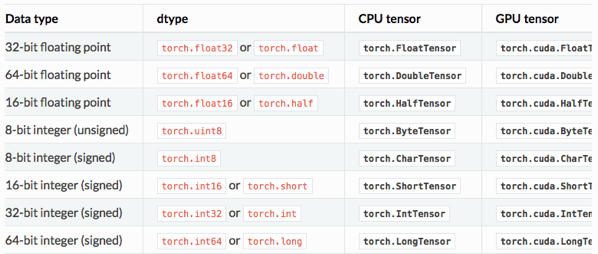

In [9]:
ft = torch.Tensor([0, 1, 2, 3, 4, 5])
print(f"Tensor type() : {ft.type()}")
print(" ")
ft1 = torch.LongTensor([0, 1, 2, 3, 4, 5])
ft2 = ft.long()
ft3 = ft.float()
print(f"LongTensor type() : {ft1.type()}")
print(ft1)
print(f"ft.long() type() : {ft2.type()}")
print(ft2)
print(f"ft.float() type() : {ft3.type()}")
print(ft3)

Tensor type() : torch.FloatTensor
 
LongTensor type() : torch.LongTensor
tensor([0, 1, 2, 3, 4, 5])
ft.long() type() : torch.LongTensor
tensor([0, 1, 2, 3, 4, 5])
ft.float() type() : torch.FloatTensor
tensor([0., 1., 2., 3., 4., 5.])


# 

### *Concatenate*

In [10]:
x = torch.Tensor([[1, 2], [3, 4]])
y = torch.Tensor([[5, 6], [7, 8]])

In [11]:
print(torch.cat([x, y], dim=0))  # 4 * 2 Tensor
print(torch.cat([x, y], dim=1))  # 2 * 4 Tensor

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


# 

### *Stacking*

In [12]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [13]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [14]:
print(torch.stack([x, y, z], dim=0))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [15]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


# 

### *one_like, zero_like*

In [16]:
x = torch.Tensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [17]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [18]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


# 

### *In-place Operation*

In [23]:
x = torch.Tensor([[0, 1, 2], [2, 1, 0]])
print(x.mul(2.))
print(x)
print(" ")
print(x.mul_(2.))
print(x)

tensor([[0., 2., 4.],
        [4., 2., 0.]])
tensor([[0., 1., 2.],
        [2., 1., 0.]])
 
tensor([[0., 2., 4.],
        [4., 2., 0.]])
tensor([[0., 2., 4.],
        [4., 2., 0.]])
